In [1]:
from sim import QubitsEprsHibridSimulation
# Parâmetros da simulação
network_info = {
    'n_initial_eprs': 5,  # Número inicial de pares EPR disponíveis na rede
    'n_initial_qubits': 10,  # Número inicial de qubits disponíveis na rede
    'topology_name': 'Grade',  # Nome da topologia a ser utilizada
    'topology_params': (3,4)  # Parâmetros da topologia (Grade: linhas e colunas)
}
info_controller = {
    'default_ttl': 30  # Tempo de vida padrão (TTL) das regras no controlador
}
info_request = {
    'n_requests': 50,  # Número de requisições a serem processadas
    'fidelity_requests_range': (0.8, 0.95),  # Intervalo de fidelidade das requisições
    'n_eprs_requests_range': (1, 5)  # Intervalo do número de EPRs por requisição
}
info_simulation = {
    'file_path': 'resultados/hibrido/hiibrid_qubits_epr.csv',  # Caminho do arquivo de saída da simulação
    'time_to_refill': 10,  # Tempo em segundos para reabastecimento de recursos
    'n_qubits_to_refill': 5,  # Número de qubits a serem reabastecidos
    'n_eprs_to_refill': 3  # Número de pares EPR a serem reabastecidos
}
simulation = QubitsEprsHibridSimulation(network_info, info_controller, info_request, info_simulation)

In [2]:
simulation.run()

Adicionando regras para 0
+---------------------+----------------------+--------------------+
| Match               | Route                | Rule               |
+=====================+======================+====================+
| (0, (0.5, 0.6), 5)  | [0]                  | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (0, (0.8, 0.9), 5)  | [0]                  | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (1, (0.5, 0.6), 5)  | [0, 1]               | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (1, (0.8, 0.9), 5)  | [0, 1]               | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (2, (0.5, 0.6), 5)  | [0, 1, 2]            | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (2, (0.8, 0.9), 5)  | [0, 1, 2]            | BasicRuleProactive |
+---------------------

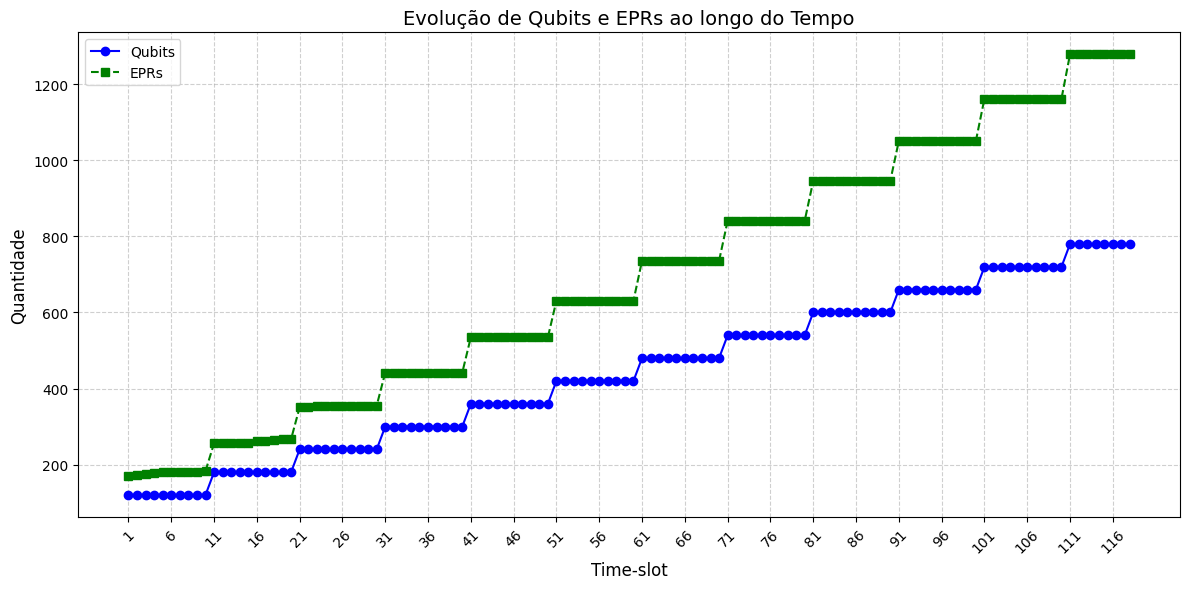

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_qubits_eprs(csv_file):
    """
    Lê um arquivo CSV sem cabeçalhos e plota gráficos mostrando a relação entre tempo (time-slot),
    qubits e EPRs, com o eixo X exibindo apenas valores de 5 em 5.
    
    Parâmetros:
        csv_file (str): Caminho para o arquivo CSV.
    """
    # Lê o arquivo CSV sem cabeçalhos
    data = pd.read_csv(csv_file, header=None, names=['time-slot', 'qubits', 'eprs'])

    # Cria o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(data['time-slot'], data['qubits'], label='Qubits', marker='o', linestyle='-', color='blue')
    plt.plot(data['time-slot'], data['eprs'], label='EPRs', marker='s', linestyle='--', color='green')
    
    # Configurações do gráfico
    plt.title('Evolução de Qubits e EPRs ao longo do Tempo', fontsize=14)
    plt.xlabel('Time-slot', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(visible=True, linestyle='--', alpha=0.6)

    # Configuração do eixo X para mostrar de 5 em 5
    xticks = data['time-slot'][::5]  # Pega os valores de time-slot a cada 5 linhas
    plt.xticks(xticks, labels=xticks, rotation=45)

    plt.tight_layout()
    
    # Exibe o gráfico
    plt.show()

plot_qubits_eprs(info_simulation['file_path'])
# Exemplo de uso
# Salve o CSV no caminho 'dados.csv' e use:
# plot_qubits_eprs('dados.csv')
